In [1]:
pip install pandas numpy scikit-learn matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
# Importação de bibliotecas
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
# Carregar o dataset
df = pd.read_csv('Wholesale customers data.csv')

In [ ]:
# Pré-processamento
# Remover colunas que não serão usadas
df.drop(columns=['Channel', 'Region'], inplace=True)
df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [ ]:
# Normalização dos dados
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [ ]:
# Aplicar K-Means (exemplo com 3 clusters, você pode ajustar)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df_scaled)
clusters = kmeans.predict(df_scaled)

# Adiciona os grupos ao dataframe original
df['Cluster'] = clusters

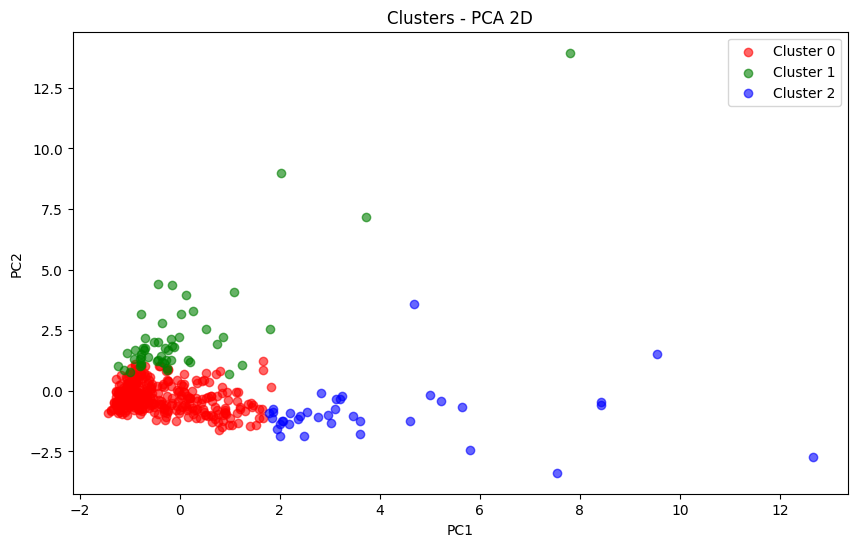

In [ ]:
# Redução de dimensionalidade com PCA (2D)
pca_2d = PCA(n_components=2)
pca_result_2d = pca_2d.fit_transform(df_scaled)
df_pca_2d = pd.DataFrame(pca_result_2d, columns=['PC1', 'PC2'])
df_pca_2d['Cluster'] = clusters

# Visualização 2D
plt.figure(figsize=(10,6))
colors = ['red', 'green', 'blue']
for i in range(3):
    plt.scatter(df_pca_2d[df_pca_2d['Cluster'] == i]['PC1'],
                df_pca_2d[df_pca_2d['Cluster'] == i]['PC2'],
                label=f'Cluster {i}', alpha=0.6, color=colors[i])
plt.legend()
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Clusters - PCA 2D')
plt.show()

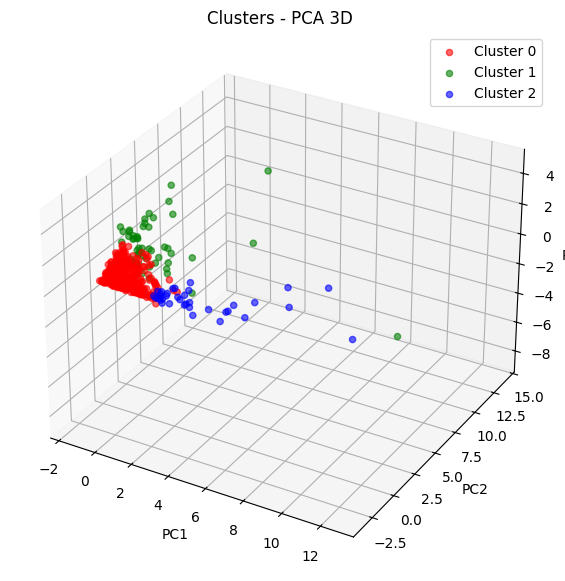

In [ ]:
# PCA 3D
pca_3d = PCA(n_components=3)
pca_result_3d = pca_3d.fit_transform(df_scaled)
df_pca_3d = pd.DataFrame(pca_result_3d, columns=['PC1', 'PC2', 'PC3'])
df_pca_3d['Cluster'] = clusters

# Visualização 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
for i in range(3):
    ax.scatter(df_pca_3d[df_pca_3d['Cluster'] == i]['PC1'],
               df_pca_3d[df_pca_3d['Cluster'] == i]['PC2'],
               df_pca_3d[df_pca_3d['Cluster'] == i]['PC3'],
               label=f'Cluster {i}', alpha=0.6, color=colors[i])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title('Clusters - PCA 3D')
plt.legend()
plt.show()